1- Behavioural plots for all conditions.

2- Unimanual: comparing RT, MT, MD, between different directions and Right and Left hands.

3- Bimanual: comparing RT, MT, MD of the same reach across matched, mirror, mirror-diagonal, unrelated conditions.

In [1]:
import os
import sys
from pathlib import Path
import glob
import getpass
import importlib

import numpy as np
import pandas as pd
import scipy.io as sio

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import utils
importlib.reload(utils)

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist')
fMRI_behavDir = os.path.join(baseDir,'data','fMRI','behavioural')
train_behavDir = os.path.join(baseDir,'data','training')
anaDir = os.path.join(baseDir,'analysis')
figDir = os.path.join(baseDir,'figures')

path = {'baseDir': baseDir,
        'fMRI_behavDir': fMRI_behavDir,
        'train_behavDir': train_behavDir,
        'anaDir': anaDir}



## Plot reaching trajectories for all conditions.

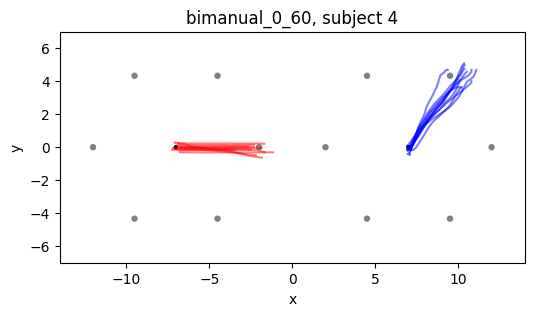

In [ ]:
sn = 4
D = pd.read_csv(os.path.join(anaDir, f'bmw_train_{sn}.csv'))
D = D[D.GoodMovement == 1]
D_mov = pd.read_csv(os.path.join(anaDir, f'bmw_train_{sn}_mov.csv'))

conds = D.cond_name.unique()
left_conds = [cond for cond in conds if 'left_' in cond]
right_conds = [cond for cond in conds if 'right_' in cond]

for cond in conds:
    BNs = D.BN[D.cond_name==cond].values.flatten()
    TNs = D.TN[D.cond_name==cond].values.flatten()
    
    # plot kinematic traces for left and right hands:
    fix, ax = plt.subplots(figsize=(6, 3))
    utils.please.draw_board(ax=ax)
    for i in range(len(BNs)):
        BN = BNs[i]
        TN = TNs[i]
        idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
        idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
        
        # kinematic traces:
        trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
        radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:idx_endReach]
        radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:idx_endReach]
        angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:idx_endReach]
        angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:idx_endReach]
        
        radius = 5
        x_offset = radius+2
        y_offset = 0
        x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
        y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
        x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
        y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

        plt.plot(x_l, y_l, color='red', alpha=0.5)
        plt.plot(x_r, y_r, color='blue', alpha=0.5)
    plt.title(f'{cond}, subject {sn}')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_xlim(-14, 14)
    ax.set_ylim(-7, 7)
    plt.savefig(os.path.join(figDir, 'behaviour', f'training_{sn}_{cond}.pdf'), bbox_inches="tight")
    if cond == 'bimanual_0_60': # show for one of the conditions as an example
        plt.show()
    else:
        plt.close()

## UNIMANUAL: how different are the directions and hands?

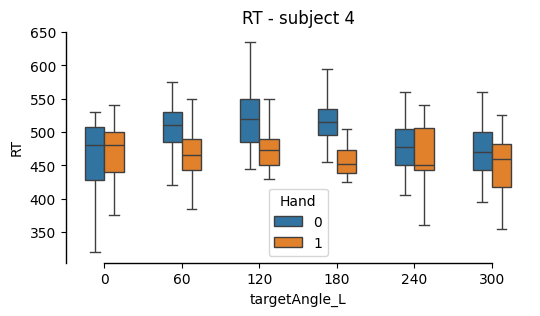

<Figure size 640x480 with 0 Axes>

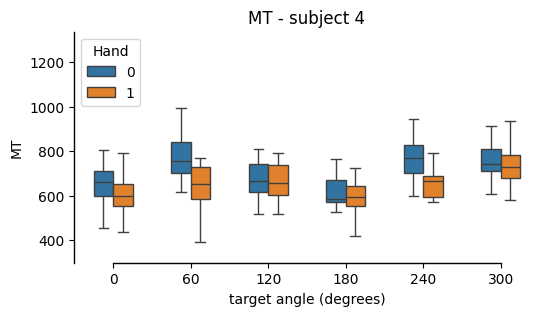

<Figure size 640x480 with 0 Axes>

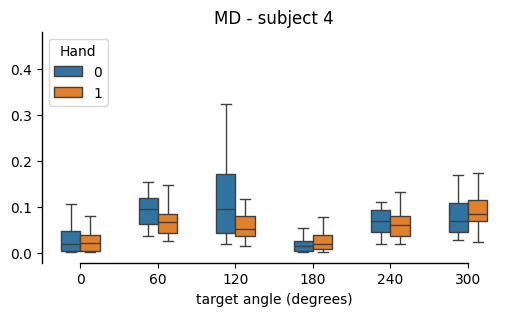

<Figure size 640x480 with 0 Axes>

In [11]:
sn = 4
D = pd.read_csv(os.path.join(anaDir, f'bmw_train_{sn}.csv'))
D = D[(D.GoodMovement == 1) & (D.Uni_or_Bi==0)]

# make a vector of left vs right:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=D, x="targetAngle_L", y="RT", hue="Hand", width=0.5, fliersize=0)
plt.title(f'RT - subject {sn}')
utils.please.make_it_pretty(ax=ax)
plt.show()
plt.savefig(os.path.join(figDir, 'behaviour', f'training_s{sn}_RT.pdf'), bbox_inches="tight")

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=D, x="targetAngle_L", y="MT", hue="Hand", width=0.5, fliersize=0)
plt.xlabel('target angle (degrees)')
plt.title(f'MT - subject {sn}')
utils.please.make_it_pretty(ax=ax)
plt.show()
plt.savefig(os.path.join(figDir, 'behaviour', f'training_s{sn}_MT.pdf'), bbox_inches="tight")

MD_left = D.MD_left.values.flatten()
MD_left[MD_left==-1] = 0
MD_right = D.MD_right.values.flatten()
MD_right[MD_right==-1] = 0
MD = MD_left + MD_right

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=D["targetAngle_L"], y=MD, hue=D["Hand"], width=0.5, fliersize=0)
plt.xlabel('target angle (degrees)')
plt.title(f'MD - subject {sn}')
utils.please.make_it_pretty(ax=ax)
plt.show()
plt.savefig(os.path.join(figDir, 'behaviour', f'training_s{sn}_MD.pdf'), bbox_inches="tight")